**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho

Aluna(o): Arthur Gomes de Siqueira

Aluna(o): Ricardo Ataide de Oliveira Junior


---


# Atividade Prática - planejamento

* Projetar um jogo de estratégia, com pelo menos dois competidores. O objetivo do jogo é sair de um local sorteado aleatoriamente, e ir visitando outros locais pelo caminho, até atingir o objetivo final. Em cada local visitado ao longo do caminho, os competidores poderão adquirir objetos, dependendo de certas condições que devem ser satisfeitas (por exemplo, o objeto estar disponível, o competidor conseguir carregá-lo, o competidor já ter adquirido um outro objeto antes - uma chave, por exemplo, para abrir um cofre, etc.). Cada objeto vale um certo número de pontos e tem suas características (tamanho, peso, etc.). Vencerá o jogo o competidor que atingir o objetivo com maior quantidade de pontos. Para evitar que o jogo nunca termine, estabeleça que, após um dos jogadores atingir o objetivo final, os demais deverão também atingí-lo dentro de um certo limite de tempo, sob pena de perder o jogo. Estabeleça também um limite de tempo máximo para o primeiro jogador atingir o objetivo e crie uma classificação dos jogadores com melhor desempenho durante várias rodadas do jogo.
* O problema deve ser resolvido utilizando as técnicas de planejamento estudadas.
* O trabalho deve ser feito em grupos, conforme definido. Cada grupo deverá entregar apenas um produto final para ser avaliado pelo professor. Apesar do trabalho ser feito em grupos, a avaliação de cada aluno será feita individualmente. Desta forma, o grupo deverá entregar um notebook, nomeado da seguinte forma: aluno01_aluno02_planejamento.ipynb, que deverá ser submetido na Plataforma Turing.

## O que deve ser entregue

(1) Descrição detalhada do modelo (representação abstrata) a ser usado na resolução do problema.

(2) Instanciação do modelo para o caso específico a ser tratado.



(3) Codificação - poderão ser utilizados códigos desenvolvidos pelo grupo e/ou códigos de terceiros. No caso de se usar códigos desenvolvidos por terceiros, o autor desses códigos deve ser devidamente referenciado e os códigos devem ser devidamente documentados (comentários no próprio código e fora dele).



(4) Descrição detalhada das atividades realizadas por cada membro do grupo.



(5) Avaliação do trabalho desenvolvido, explicitando suas vantagens e limitações.


(6) Um vídeo explicando detalhadamente como a técnica estuda foi utilizada para resolver o problema proposto.

## Distribuição do trabalho:

Arthur e Ricardo trabalhamos muito junto tanto na construção e definição do modelo e problema, execução dos testes e como implementar o nosso problema em si

Vale destacar que o Arthur focou um pouco mais nos codigos em relação ao Ricardo mas o Ricardo ajudou com dúvidas e sugestões. E em compensação Ricardo focou em outras soluções e outros testes de outras plataformas a qual o Arthur ajudou também com discussão e dúvidas.

## Video

Link: https://drive.google.com/file/d/1ZY_75VFx0IMEHae6d3n3kXcO8E4jj9-o/view?usp=sharing

###(1) Descrição detalhada do modelo (representação abstrata) a ser usado na resolução do problema.
### Apresentação do mundo:
 * Jogadores
    * Será representado por Jogador 1 e Jogador 2
    * Jogador 1 sempre jogará primeiro e posteriormente o Jogador 2 em segundo
 * Mapa do mundo
    * Representado por um conjunto de cidades, dentre elas uma sendo o objetivo. Tal "conjunto" será um grafo direcional que representará a conexão entre as cidades
    * Os jogadores vão estar em um desses nós no inicio do jogo que será gerado aleatoriamente
 * Cidades
    * Serão representadas como nós 
 * Conexões entre as cidades
    * Representado através de uma uma seta de uma cidade para outra
    * As conexões são direcionadas então elas vão de uma cidade A para B e não podem ir da cidade B para a A
 * Chaves, baús
    * Em cada cidade pode haver um item a qual pode ser tanto uma chave, um bau ou os dois ou nenhum deles, 
    * As chaves servem para abrir o bau
    * Os baus servem para o jogador ganhar seus pontos apos serem abertos por uma chave
 * Pontuações dos itens
    * Cada bau tem uma pontuação aleatória que vai estar na faixa de 30 á 120 pontos
 * Neste mundo também existe o conceito de tempo
    * Após o primeiro jogador chegar no nó objetivo, o outro jogador terá um limite x de tempo (o tempo do jogador 1 + 20%) para também alcançar o mesmo nó, caso não consiga, o mesmo perderá independente da quantidade de pontos.
  




 # Abordagem STRIPS:
  * Possui pré condições para realizar uma determinada ação - ir do estado A para o estado B
  * Possuí o estado atual
  * Possuí pós condições, que é o estado final resultante

# Resumo do modelo de abordagem STRIPS utilizado:
## Estados – Caractéristica{

* PLAYER_LOC – Localização do player		

* CHAVE_NO – Tem uma chave no nó

* BAU_NO – Tem um bau no nó

* PLAYER_COM_CHAVE – Player tem uma chave

}
## Ações

move{

*   **Pré requisitos:** Jogador não estar no nó objetivo, possuir um nó fronteira para onde o jogador possa se mover, o tempo para execução de ações não esteja esgotado
*   **Ação:** Mover de uma posição para outra,
*    **Novo estado alcançado:** Jogador na localização de uma cidade vizinha a cidade anterior.

}

pegar_chave – {

*   **Pré requisitos:** Jogador possuir nenhuma chave em sua posse, existir uma chave no nó/cidade em que o jogador está
*   **Ação:** Coleta uma chave
*    **Novo estado alcançado:** Jogador possuí uma chave

}


abrir_bau {

*   **Pré requisitos:** Jogador possuir uma chave em sua posse, existir baú no nó/cidade em que o jogador está
*   **Ação:** Abre um baú
*    **Novo estado alcançado:** Jogador coleta a pontuação do item presente no baú

}




## Implementação:
  * Tempo: O(n), onde n é a quantidade de nós
  * Espaço: O(n)
  * O problema ele não será um algoritmo ótimo e completo, sempre retornando o melhor resultado possível

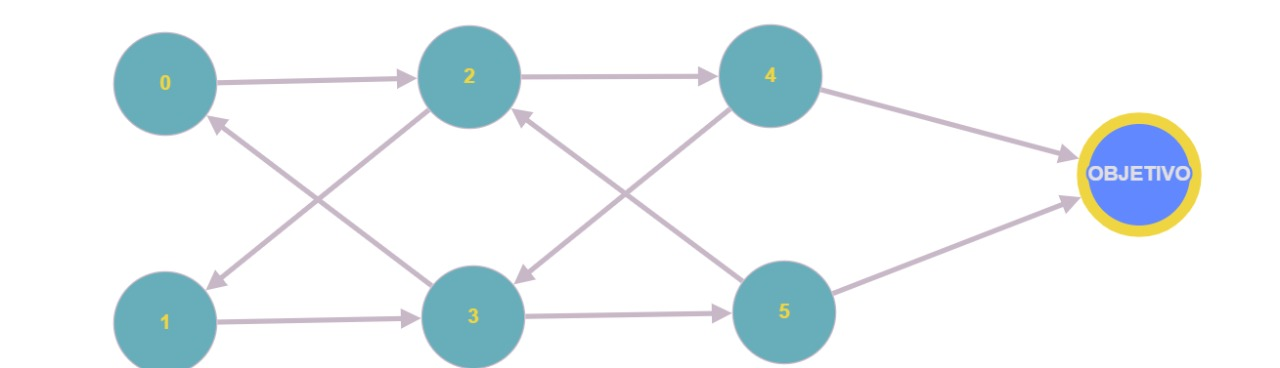

In [ ]:
from IPython.display import Image
Image("grafo.png")

In [ ]:
#Baseado no codigo de planejamento que o professor apresentou em aula
import time as time
import random #biblioteca para gerar numeros aleatorios

"""
define a representação STRIPS para uma ação:
- preconditions é um dicionário 'feature:value' que deve valer para a ação que está sendo executada.
- effects é um mapeamento 'feature:value' que esta ação torna verdadeiro. A ação muda o valor de uma 
característica específica, e deixa as outras inalteradas.
- cost é o custo da ação.
"""
class Strips(object): 
  def __init__(self, preconditions, effects, cost=1):
    self.preconditions = preconditions
    self.effects = effects
    self.cost = cost

""" 
O domínio do problema 
- feats_vals é um dicionário 'feature:domain', que mapeia cada caracterísica para 
o seu domínio (valores possíveis das características).
- 'actions' é um dicionário 'action:strips', que mapeia cada ação para a sua 
representação Strips(precondições, efeitos).
"""
class STRIPS_domain(object):
  def __init__(self, feats_vals, strips_map):
    self.feats_vals = feats_vals
    self.actions = strips_map # conjunto de todas as ações

"""
O planejamento do problema que possui:
- prob_domain que seria o dominio
- state que é o estado que estamos
- goal que seria a nossa meta, onde queremos chegar
"""
         
class Planning_problem(object):
  def __init__(self, prob_domain, state, goal):
    self.prob_domain = prob_domain
    self.state = state
    self.goal = goal



In [ ]:
# Especificação do problema NOME_DO_JOGO: 

#Especificaçoes do jogo e regras estabelecidas
boolean = {True, False}
delivery_domain = STRIPS_domain(
    {'PLAYER_LOC':{'0', '1', '2', '3', '4', '5', 'Objetivo'}, 'CHAVE_NO':boolean, 'BAU_NO':boolean, 
    'PLAYER_COM_CHAVE':boolean}, #dicionário de 'características:valores'
    {'move_0_2': Strips({'PLAYER_LOC':'0'}, {'PLAYER_LOC':'2'}), 
     'move_2_4': Strips({'PLAYER_LOC':'2'}, {'PLAYER_LOC':'4'}),
     'move_2_1': Strips({'PLAYER_LOC':'2'}, {'PLAYER_LOC':'1'}),
     'move_4_3': Strips({'PLAYER_LOC':'4'}, {'PLAYER_LOC':'3'}),
     'move_4_Objetivo': Strips({'PLAYER_LOC':'4'}, {'PLAYER_LOC':'Objetivo'}),
     'move_5_Objetivo': Strips({'PLAYER_LOC':'5'}, {'PLAYER_LOC':'Objetivo'}),
     'move_5_2': Strips({'PLAYER_LOC':'5'}, {'PLAYER_LOC':'2'}),
     'move_3_5': Strips({'PLAYER_LOC':'3'}, {'PLAYER_LOC':'5'}),
     'move_3_0': Strips({'PLAYER_LOC':'3'}, {'PLAYER_LOC':'0'}),
     'move_1_3': Strips({'PLAYER_LOC':'1'}, {'PLAYER_LOC':'3'}),
     'pegar_chave': Strips({'PLAYER_COM_CHAVE':False, 'CHAVE_NO': True}, {'PLAYER_COM_CHAVE':True}),
     'abrir_bau': Strips({'PLAYER_COM_CHAVE':True, 'BAU_NO': True}, {'PLAYER_COM_CHAVE':False})
    } )# strips-map - dicionário 'ações: Strips(precondições, efeitos, custo=1)'

In [ ]:
#vai marcar o tempo
def marcar_tempo():
  return time.time();

In [ ]:
#algoritmo dfs
def dfs(problema, pontos, loc_key, loc_bau, Grafo):
  visitados = set()
  return dfs_recursivo(visitados, pontos, problema, loc_key, loc_bau, Grafo)

#algoritmo dfs recursivo, recursao do dfs
def dfs_recursivo(visitados, pontos, problema, loc_key, loc_bau, Grafo):

  voltar_problema_inicio = problema # pega o problema original
  localizacao_jogador = problema.state['PLAYER_LOC'] #pega a localizacao do jogador
  
  #verifica se tem chave no nó e se o jogador pode pegar a chave
  if (loc_key[localizacao_jogador] == problema.prob_domain.actions['pegar_chave'].preconditions['CHAVE_NO'] and 
      problema.state['PLAYER_COM_CHAVE'] == problema.prob_domain.actions['pegar_chave'].preconditions['PLAYER_COM_CHAVE']):
    
    #jogador pega a chave
    problema.state['PLAYER_COM_CHAVE'] = problema.prob_domain.actions['pegar_chave'].effects['PLAYER_COM_CHAVE']
    
  #verifica se tem bau no nó e se o jogador tem chave para abrir
  if (loc_bau[localizacao_jogador] == problema.prob_domain.actions['abrir_bau'].preconditions['BAU_NO'] and 
      problema.state['PLAYER_COM_CHAVE'] == problema.prob_domain.actions['abrir_bau'].preconditions['PLAYER_COM_CHAVE']):
    
    #jogador abre o bau
    problema.state['PLAYER_COM_CHAVE'] = problema.prob_domain.actions['abrir_bau'].effects['PLAYER_COM_CHAVE']
    
    #jogador abriu o bau e ganhou uma quantidade X de pontos
    pontos = pontos + 1

  visitados.add(localizacao_jogador) #cidade atual adicionada como visitada
  
  #chegou ao destino
  if (localizacao_jogador == problema.goal['PLAYER_LOC']):
    return pontos

  #maximo de pontos marcado pelo jogador
  maximo_de_pontos = 0
  for cidade_viz in Grafo[localizacao_jogador]:
    if cidade_viz in visitados: #verifica se cidade vizinha foi visitada
      continue
    
    mov = 'move_' + localizacao_jogador + '_' + cidade_viz

    #verifica se podemos mover de uma cidade pra outra
    if(localizacao_jogador == problema.prob_domain.actions[mov].preconditions['PLAYER_LOC'] and 
       cidade_viz == problema.prob_domain.actions[mov].effects['PLAYER_LOC']):
      
      #muda a localizacao do jogador para a nova
      problema.state['PLAYER_LOC'] = cidade_viz
      maximo_de_pontos = max(maximo_de_pontos, dfs_recursivo(visitados, pontos, problema, loc_key, loc_bau, Grafo)) #procura nos seus vizinhos a maior pontuacao possivel
      problema = voltar_problema_inicio #voltamos ao problema original

  visitados.remove(localizacao_jogador) #remove cidade como visitado
  return maximo_de_pontos;

#algoritmo dfs jogador 2
def dfs_jogador2(problema, pontos, loc_key, loc_bau, Grafo):
  visitados = set()
  return dfs_recursivo_jogador2(visitados, pontos, problema, loc_key, loc_bau, Grafo)

#algoritmo dfs recursivo, so um suporte
def dfs_recursivo_jogador2(visitados, pontos, problema, loc_key, loc_bau, Grafo):

  voltar_problema_inicio = problema # pega o problema original
  localizacao_jogador = problema.state['PLAYER_LOC'] #pega a localizacao do jogador
  vitoria_jogador2 = 0 #marca se o jogador venceu(1), perdeu por tempo(-1) ou esta ainda competindo(0)

  #verifica se tem chave no nó e se o jogador pode pegar a chave
  if (loc_key[localizacao_jogador] == problema.prob_domain.actions['pegar_chave'].preconditions['CHAVE_NO'] and 
      problema.state['PLAYER_COM_CHAVE'] == problema.prob_domain.actions['pegar_chave'].preconditions['PLAYER_COM_CHAVE']):
    
    #jogador pega a chave
    problema.state['PLAYER_COM_CHAVE'] = problema.prob_domain.actions['pegar_chave'].effects['PLAYER_COM_CHAVE']
      
  #verifica se tem bau no nó e se o jogador tem chave para abrir
  if (loc_bau[localizacao_jogador] == problema.prob_domain.actions['abrir_bau'].preconditions['BAU_NO'] and problema.state['PLAYER_COM_CHAVE'] == problema.prob_domain.actions['abrir_bau'].preconditions['PLAYER_COM_CHAVE']):
    
    #jogador abre o bau
    problema.state['PLAYER_COM_CHAVE'] = problema.prob_domain.actions['abrir_bau'].effects['PLAYER_COM_CHAVE']
    
    #jogador abriu o bau e ganhou uma quantidade X de pontos
    pontos = pontos + 1

  visitados.add(localizacao_jogador) #cidade atual adicionada como visitada
  
  #jogador chegou ao destino
  if (localizacao_jogador == problema.goal['PLAYER_LOC']):  
    return pontos #retorna qtd de bau coletados

  maximo_de_pontos = 0
  for cidade_viz in Grafo[localizacao_jogador]:
    if cidade_viz in visitados: #verifica se cidade vizinha foi visitada
      continue
    
    mov = 'move_' + localizacao_jogador + '_' + cidade_viz

    #verifica se podemos mover de uma cidade pra outra
    if(localizacao_jogador == problema.prob_domain.actions[mov].preconditions['PLAYER_LOC'] and 
       cidade_viz == problema.prob_domain.actions[mov].effects['PLAYER_LOC']):
      
      problema.state['PLAYER_LOC'] = cidade_viz #muda a localizacao do jogador para a nova
      resultado = dfs_recursivo_jogador2(visitados, pontos, problema, loc_key, loc_bau, Grafo)
      maximo_de_pontos = max(maximo_de_pontos, resultado) #pega o maximo de pontos

      problema = voltar_problema_inicio #problema volta pro original

  visitados.remove(localizacao_jogador) #remove cidade como visitado
  return maximo_de_pontos;


In [ ]:
#setup

#Cada localização e verificando se há bau ou nao
localizacao_bau = {'0': False, '1': False, '2': True, '3': True, '4': False, '5': False, 'Objetivo': True}

#MUDAR O VALOR DAS VARIAVEIS
#Cada localização e verificando se há chave ou nao 
localizacao_key = {'0': True, '1': True, '2': False, '3': False, '4': False, '5': True, 'Objetivo': False}

Full_Grafo = {'0': ['2'],
              '1': ['3'],
              '2': ['1', '4'],
              '3': ['0', '5'],
              '4': ['3', 'Objetivo'],
              '5': ['2', 'Objetivo'],
              'Objetivo': []}

## Realização de alguns testes

In [ ]:
jogador_1_win = 0
jogador_2_win = 0
for i in range(0,10):
  #testes
  print ('\n============================================================TESTE ', i,'============================================================' )
  situacao_jogador1 = Planning_problem(delivery_domain, #domínio
      {'PLAYER_LOC': str(random.randrange(0, 6)), 'CHAVE_NO':False, 'BAU_NO':False, 'PLAYER_COM_CHAVE':False}, #estado inicial
      {'PLAYER_LOC':'Objetivo'}) #meta

  situacao_jogador2 = Planning_problem(delivery_domain, #domínio
      {'PLAYER_LOC': str(random.randrange(0, 6)), 'CHAVE_NO':False, 'BAU_NO':False, 'PLAYER_COM_CHAVE':False}, #estado inicial
      {'PLAYER_LOC':'Objetivo'}) #meta

  #primeiro jogador
  print("\nJogador 1 começa jogar\n")

  tempo_inicio = marcar_tempo()
  bau_encontrado = dfs(situacao_jogador1, 0, localizacao_key, localizacao_bau, Full_Grafo)
  tempo_final = marcar_tempo()

  pontos_jogador1 = 0
  for i in range(0, bau_encontrado):
    pontos_jogador1 = pontos_jogador1 + random.randrange(30, 121)
  
  print("Quantidade de pontos marcados pelo jogador 1: ", pontos_jogador1)

  valor_tempo = tempo_final - tempo_inicio
  print("Tempo Gasto pelo jogador 1: ", valor_tempo)
  print("Tempo Gasto pelo jogador 1 + limite(20% do tempo do jogador 1): ", valor_tempo + (valor_tempo * 0.2))

  #segundo jogador
  print("\nJogador 2 começa a jogar\n")
  tempo_inicio2 = marcar_tempo()
  bau_encontrado2 = dfs_jogador2(situacao_jogador2, 0, localizacao_key, localizacao_bau, Full_Grafo)
  tempo_final2 = marcar_tempo()
  
  pontos_jogador2 = 0
  for i in range(0, bau_encontrado2):
    pontos_jogador2 = pontos_jogador2 + random.randrange(30, 121)
  
  print("Quantidade de pontos marcados pelo jogador 2: ", pontos_jogador2)

  valor_tempo2 = tempo_final2 - tempo_inicio2
  print("Tempo Gasto pelo jogador 2: ", valor_tempo2)
  print("")
  if(valor_tempo2 > valor_tempo + (valor_tempo * 0.2)):
    print("Vitoria jogador 1 por jogador 2 nao conseguir terminar no tempo")
    jogador_1_win = jogador_1_win + 1
  else:
    if(pontos_jogador1 > pontos_jogador2):
      print("Vitoria jogador 1 por mais pontos")
      jogador_1_win = jogador_1_win + 1
    elif(pontos_jogador1 < pontos_jogador2):
       jogador_2_win = jogador_2_win + 1
       print("Vitoria jogador 2 por mais pontos")

    print("Pontos jogador 1: " + str(pontos_jogador1) + " Pontos jogador 2: " + str(pontos_jogador2))
  #time.sleep(0.5)

print("")
print('Vitórias do Jogador 1 : ', jogador_1_win)
print('Vitórias do Jogador 2 : ', jogador_2_win)





============================================================TESTE  0 ============================================================

Jogador 1 começa jogar

Quantidade de pontos marcados pelo jogador 1:  209
Tempo Gasto pelo jogador 1:  5.7697296142578125e-05
Tempo Gasto pelo jogador 1 + limite(20% do tempo do jogador 1):  6.923675537109374e-05

Jogador 2 começa a jogar

Quantidade de pontos marcados pelo jogador 2:  195
Tempo Gasto pelo jogador 2:  4.172325134277344e-05

Vitoria jogador 1 por mais pontos
Pontos jogador 1: 209 Pontos jogador 2: 195

============================================================TESTE  1 ============================================================

Jogador 1 começa jogar

Quantidade de pontos marcados pelo jogador 1:  116
Tempo Gasto pelo jogador 1:  4.1961669921875e-05
Tempo Gasto pelo jogador 1 + limite(20% do tempo do jogador 1):  5.035400390625e-05

Jogador 2 começa a jogar

Quantidade de pontos marcados pelo jogador 2:  98
Tempo Gasto pelo jogador 2:  

# Modelo em PDDL para execução do STRIPS na ferramenta: https://stripsfiddle.herokuapp.com/

Para comparação, foi realizada a implementação em linguagem PDDL, do modelo aplicado nesta solução com apenas algumas pequenas modificações, as quais foram baseadas na modelagem e sintaxe apresentadas por Kory Becker, na publicação: http://www.primaryobjects.com/2015/11/06/artificial-intelligence-planning-with-strips-a-gentle-introduction/

A implementação completa do código baixa na ferramenta citada pode ser acessada através do endereço:
http://stripsfiddle.herokuapp.com?d=FcXkPJ8gjP8xt7za8&p=LzXGPQjGYqqqufLTN&a=BFS

O código desenvolvido segue abaixo:

    (define (domain world-chest)   -- É definido o 'mundo' do Strips, as ações possíveis e os agentes deste mundo
    (:requirements :strips :typing)
    (:types player location chest key)

    (:action move --Ação de mover entre nós/cidades vizinhas
        :parameters (?p - player ?l1 - location ?l2 - location)
        :precondition (and ((at ?p ?l1) (border ?l1 ?l2))
        :effect (and (at ?p ?l2) not (at ?p ?l1))
    )
    
    (:action collected-key -Coleta uma chave somente se o jogador não possuir uma chave e se houver uma chave no nó em que o jogador se encontra 
        :parameters (?p - player ?k - key ?l1 - location)
        :precondition (and ((at ?p ?l1) (at ?k ?l1) not (has-key ?p)) 
        :effect (and(has-key ?p) not (at ?l1 ?k))
    )

    (:action open-chest  -- Abre um baú sempre que o jogador possuir uma chave e, na posição atual do jogador, hover um baú
        :parameters (?p - player ?c - chest ?l1 - location ?k - key)
        :precondition (and (at ?p ?l1) (at ?c ?l1) (has-key ?p) not (open ?c))
        :effect (and(open ?c) not (has-key ?p))
    )
    )



    -- Inicia a Definição do problema
    (define (problem collect-chests-while-going-to-goal)
    (:domain world-chest)

    (:objects
        npc - player
        chave1 chave2 chave3 - key
        box1 box2 box3 - chest
        0 1 2 3 4 5 objetivo - location
    )
    (:init  
        -- São definidas as cidades que são vizinhas entre si
        (border 0 2)
        (border 2 4)
        (border 2 1)
        (border 4 3)
        (border 4 objetivo)
        (border 5 objetivo)
        (border 5 2)
        (border 3 5)
        (border 3 0)
        (border 1 3)

        -- Definido a posição de inicio do jogador, chamado de npc
        (at npc 0)
        -- Define a posição das chaves e dos baús
        (at chave1 0)
        (at chave2 1)
        (at chave3 5)
        (at box1 2)
        (at box2 3)
        (at box3 objetivo)



    )
    -- Neste ponto é definido o objetivo, o objetivo é o mais 'complexo' possível, pois este será abrir todos os baús e chegar ao nó objetivo.
    (:goal (and (open box1) (open box2) (open box3) (at npc objetivo)))
    )









## Considerações

Executando o algoritmo implementado pelo grupo:

In [ ]:
#testes

situacao_jogador1 = Planning_problem(delivery_domain, #domínio
    {'PLAYER_LOC': '0', 'CHAVE_NO':False, 'BAU_NO':False, 'PLAYER_COM_CHAVE':False}, #estado inicial
    {'PLAYER_LOC':'Objetivo'}) #meta


#primeiro jogador
print("\nJogador 1 começa jogar\n")

tempo_inicio = marcar_tempo()
bau_encontrado = dfs(situacao_jogador1, 0, localizacao_key, localizacao_bau, Full_Grafo)
tempo_final = marcar_tempo()

pontos_jogador1 = 0
for i in range(0, bau_encontrado):
  pontos_jogador1 = pontos_jogador1 + 1

print("Quantidade de baús abertos: ", pontos_jogador1)

valor_tempo = tempo_final - tempo_inicio
print("Tempo Gasto pelo jogador 1: ", valor_tempo)
print("Tempo Gasto pelo jogador 1 + limite(20% do tempo do jogador 1): ", valor_tempo + (valor_tempo * 0.2))

 


Jogador 1 começa jogar

Quantidade de baús abertos:  3
Tempo Gasto pelo jogador 1:  0.0001728534698486328
Tempo Gasto pelo jogador 1 + limite(20% do tempo do jogador 1):  0.00020742416381835938


Ao comparar a solução com a solução apresentada na ferramenta citada, quando se utiliza a busca em largura, a primeira impressão que se tem é que a ferramenta leva muito mais tempo para a conclusão do problema, no entanto, apesar disto, ao utilizar a própria ferramenta para comparar a busca em largura em relação a busca em profundidade nota-se que a busca em largura sempre apresenta o melhor resultado, embora este seja mais demorado.

# Ánalise da metodologia utilizada

Para solução do problema foi aplicada o método de planejamento Strips em conjunto com uma busca em profundidade. 

Tal estratégia não é a estratégia que possuí a maior otimicidade, devido também as limitações que a própria busca em profundidade possui, no entanto suas vantagens estão presentes no custo computacional reduzido. 

O planejador Strips é extremamente limitado para "casos reais" onde existe a ação de agentes não deterministicos, a presença de baús com itens de pontuações aleatórias que são definidas somente no momento da abertura dos baús é uma maneira de aproximar essa ação de tais fatores "não previsiveis". O algoritmo não tem como saber qual será o caminho que lhe garantirá mais pontos, e, por esta razão, teria que tentar abrir o maior número de baús possíveis para alcançar a maior pontuação. Além das limitações que o modelo possuí no caso de houver um grafo de ações possíveis que crescem exponencialmente, supondo que, o nosso grafo possua muitos nós (cidades) a lista de ações do nosso planejador Strips cresceria exponencialmente, aumentando muito a complexidade do problema.

Para problemas simples, de baixa complexidade, como foi o caso apresentado na implementação (um grafo com 7 nós) o planejador STRIPS teve um desempenho aceitável, no entanto, o fato dos baús terem valores aleatórios, faz com que o planejador não seja capaz de procurar uma estimativa de caminho com maior pontuação, a não ser que o agente faça diversos percursos várias vezes, e, identifique a maior pontuação, exigindo assim um custo computacional que pode se elevar conforme a quantidade de nós do grafo aumenta